This notebook demonstrates how to plot total effective areas for various detector configurations. It specifically uses the fictive detector, but can easily be adapted to use all detectors available to the user.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from toise import factory, plotting
import warnings
warnings.filterwarnings("ignore") # turn off warnings

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
factory.set_kwargs(psi_bins={k: [0, np.pi] for k in ('tracks', 'cascades', 'radio')})

In [3]:
radio_aeff = factory.get('Fictive-Radio')['radio_events'][0]
optical_aeff = factory.get('Fictive-Optical')['cascades'][0]

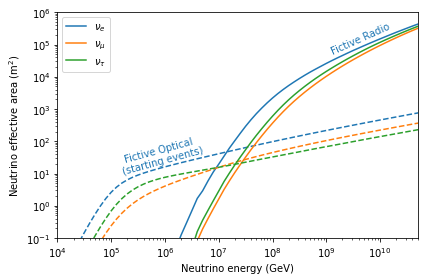

In [4]:
cos_theta = radio_aeff.bin_edges[radio_aeff.dimensions.index('true_zenith_band')-1]
flavors = ['${}$' .format([r'\nu', r'\overline{\nu}'][i % 2] + '_{' + ['e', r'\mu', r'\tau'][i//2] +'}') for i in range(6)]
fig = plt.figure()
ax = fig.subplots()
for i in range(0,6,2):
    line = ax.loglog(radio_aeff.bin_edges[0][1:], radio_aeff.values[i,...].mean(axis=1).sum(axis=(1,2)))[0]
    line.set_label(flavors[i])
    line = ax.loglog(optical_aeff.bin_edges[0][1:], optical_aeff.values[i,...].mean(axis=1).sum(axis=(1,2)), color=line.get_color(), ls='--')[0]
    
ax.set_ylabel(r'Neutrino effective area (m$^2$)')
ax.set_xlabel(r'Neutrino energy (GeV)')
ax.set_xlim(1e4, 5e10)
ax.set_ylim(1e-1, 1e6)

ax.legend()

plotting.label_curve(ax, ax.lines[0], x=5e9, offset=5, label='Fictive Radio')
plotting.label_curve(ax, ax.lines[1], x=1e6, offset=5, label='Fictive Optical \n(starting events)')

plt.tight_layout()
fig.savefig('effAreaEx.pdf')
